In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from hdf5storage import loadmat
import h5py

In [2]:

mat_file_path = f'data/CC182-1028/CC182_241028_Combined_dFFdotMeanValues.mat'

with h5py.File(mat_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset
    data = f['dFFdotMeanValues']
    
    # Check the shape of the dataset
    N_STIMS, N_SESSIONS  = data.shape
    N_NEURONS, N_REPS = f[data[0, 0]].shape
    

    X = np.reshape([np.asarray(f[data[stim_i, session_i]]).T for stim_i in range(N_STIMS) for session_i in range(N_SESSIONS)],
                   (N_SESSIONS*N_STIMS*N_REPS, -1))
    
stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS)).ravel()

In [6]:
X.shape (# trials, # neurons)

(1920, 48)

In [4]:
# rearranging to have 96 stims instead of 48
inst0_sessions = [0,1]
inst1_sessions = [2,3]
with h5py.File(mat_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset 
    data = f['dFFdotMeanValues']
    
    # Check the shape of the dataset
    N_STIMS, N_SESSIONS  = data.shape
    N_NEURONS, N_REPS = f[data[0, 0]].shape
    X_inst0 = np.reshape([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst0_sessions] 
                          for stim_i in range(N_STIMS)], (N_STIMS, 2 * N_REPS, N_NEURONS))
    X_inst1 = np.reshape([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst1_sessions] 
                          for stim_i in range(N_STIMS)], (N_STIMS, 2 * N_REPS, N_NEURONS))
    X = np.concatenate([X_inst0, X_inst1]).reshape(2*N_STIMS * N_SESSIONS//2 * N_REPS, -1) (# trials , # neurons)

N_STIMS = 2 * N_STIMS
N_SESSIONS = N_SESSIONS // 2
stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS)).ravel()

Text(0.5, 0, 'PC')

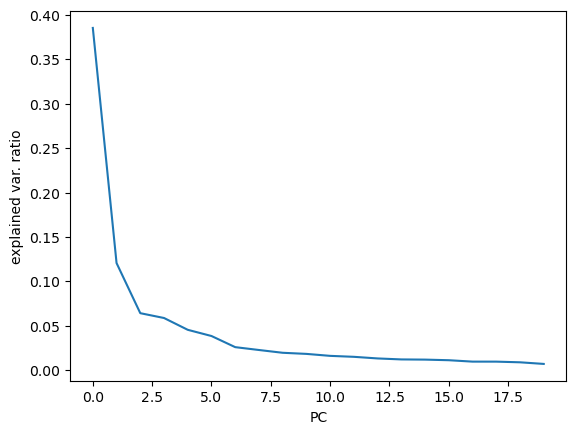

In [166]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(20)
Y = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('explained var. ratio')
plt.xlabel('PC')

In [120]:
with open('movie_2024_10_23/stim_frames_global.txt', 'r') as f:
    ls = f.readlines()[1:]
stim_info = [[i]+l.split() for i,l in enumerate(ls)]

stim_idxs = {}
stim_dirs = {}
for i, frame, stimname in stim_info:
    stim_root = stimname.split('_dir')[0]
    stim_idxs[stim_root] = stim_idxs.get(stim_root, []) + [i]
    
stim_idxs

{'-3dotD2': [0, 7, 17, 22, 27, 35, 39, 47, 51, 58, 60, 67, 77, 81, 89, 93],
 'gratW12.5': [1, 9, 15, 23, 25, 33, 41, 45, 48, 55, 62, 68, 72, 79, 87, 95],
 'gratW2': [2, 8, 16, 18, 28, 30, 37, 44, 53, 57, 65, 70, 75, 82, 84, 91],
 '-1dotD2': [3, 11, 12, 19, 29, 34, 36, 43, 49, 56, 64, 66, 76, 78, 85, 92],
 '+1dotD2': [4, 6, 13, 21, 26, 32, 40, 42, 52, 54, 61, 69, 74, 83, 88, 90],
 '+3dotD2': [5, 10, 14, 20, 24, 31, 38, 46, 50, 59, 63, 71, 73, 80, 86, 94]}

In [ ]:
significant bouton file
- rows: neurons
- cols: 1st col: significance of responses 

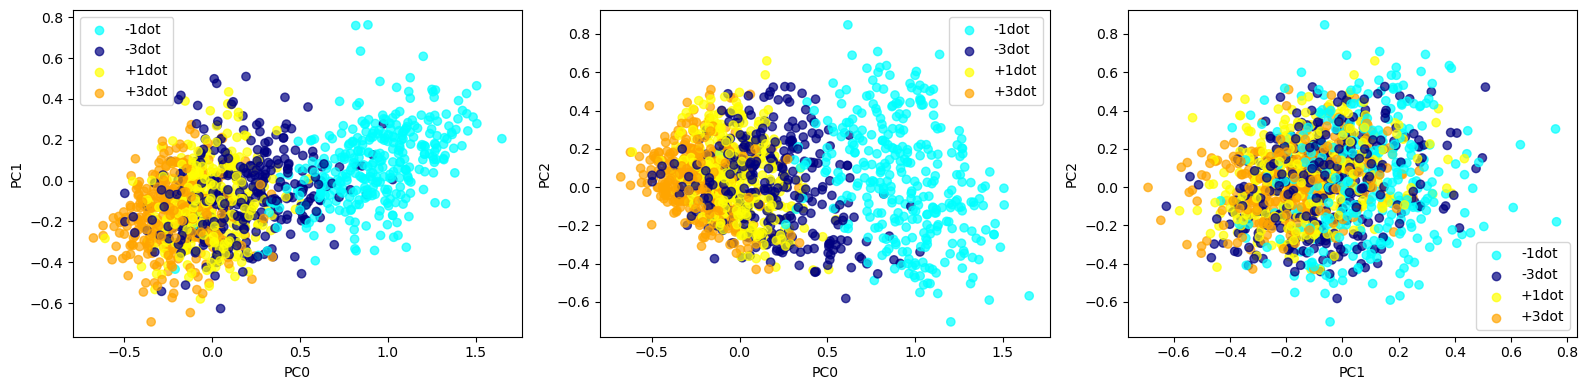

In [163]:
### - FLOWS vs + FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['-1dotD2']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['-3dotD2']:
    c[(stimulus_labels == i)] = 2
for i in stim_idxs['+1dotD2']:
    c[(stimulus_labels == i)] = 3
for i in stim_idxs['+3dotD2']:
    c[(stimulus_labels == i)] = 4


colors = ['cyan','navy','yellow','orange']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i-1] for i in c if i > 0]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-1dot'), (2, .7, '-3dot'), 
                                                (3, .7, '+1dot'), (4, .7, '+3dot')]):
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[c > 0][:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

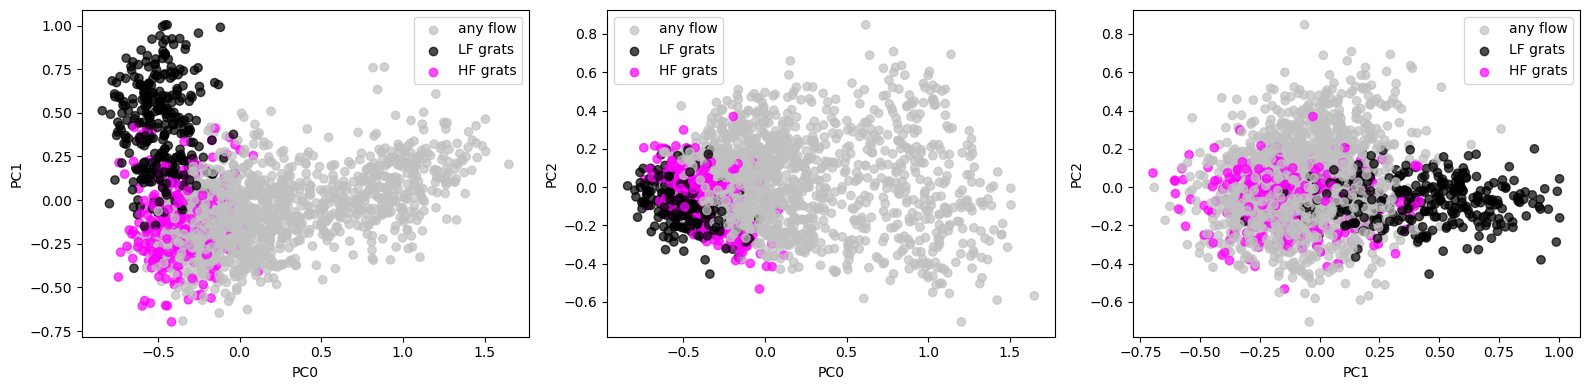

In [157]:
### GRATINGS vs. FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['gratW12.5']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['gratW2']:
    c[(stimulus_labels == i)] = 2




colors = ['silver','black','magenta']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i] for i in c]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(0, .7, 'any flow'), (1, .7, 'LF grats'), (2, .7, 'HF grats')]):
        #ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    

f.tight_layout()
plt.show()

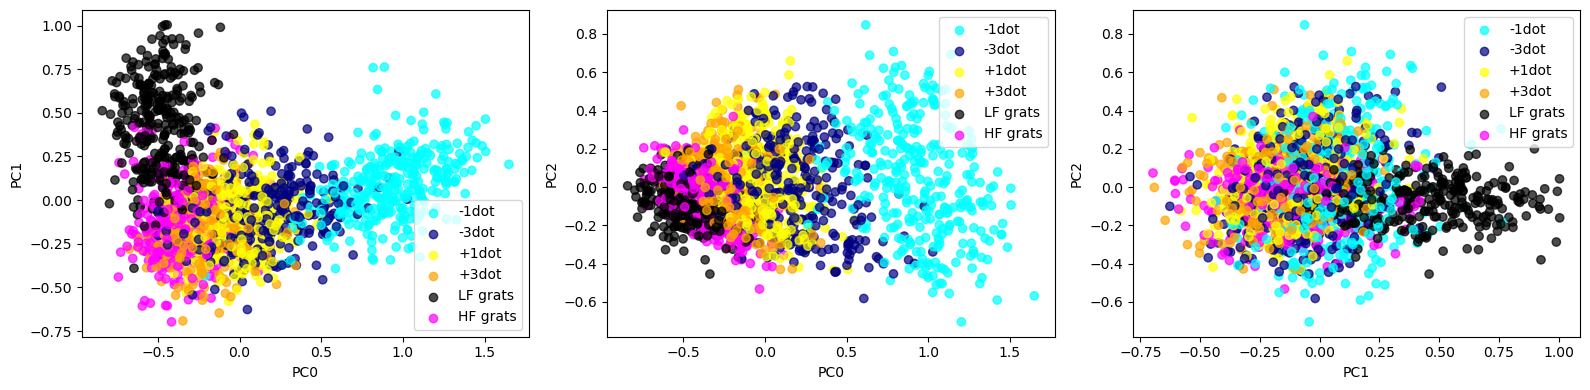

In [158]:
### GRATINGS vs. FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['-1dotD2']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['-3dotD2']:
    c[(stimulus_labels == i)] = 2
for i in stim_idxs['+1dotD2']:
    c[(stimulus_labels == i)] = 3
for i in stim_idxs['+3dotD2']:
    c[(stimulus_labels == i)] = 4
for i in stim_idxs['gratW12.5']:
    c[(stimulus_labels == i)] = 5
for i in stim_idxs['gratW2']:
    c[(stimulus_labels == i)] = 6




colors = ['cyan','navy','yellow','orange'] + ['black','magenta']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i-1] for i in c]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-1dot'), (2, .7, '-3dot'), 
                                                (3, .7, '+1dot'), (4, .7, '+3dot'),
                                                (5, .7, 'LF grats'), (6, .7, 'HF grats')]):
        #ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name, ec=colors[i])
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    

f.tight_layout()
plt.show()

In [ ]:
# ### GRATING DIRECTIONS

# PCs = [(0,1), (0,2), (1,2)]

# labels_to_use = stimulus_labels
# gratings_vs_flows = np.zeros_like(stimulus_labels)
# gratings_vs_flows[(stimulus_labels == 6) | (stimulus_labels == 11) | (stimulus_labels == 19) | (stimulus_labels == 31)] = 1

# gratings_dirs = np.zeros_like(stimulus_labels)
# gratings_dirs[(stimulus_labels == 6)] = 1
# gratings_dirs[(stimulus_labels == 11)] = 2
# gratings_dirs[(stimulus_labels == 19)] = 3
# gratings_dirs[(stimulus_labels == 31)] = 4
# gratings_dirs = gratings_dirs[gratings_vs_flows > 0]



# f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

# for ax, pcs in zip(axes, PCs):
#     ax.scatter(*Y[gratings_vs_flows > 0][:,pcs].T, c=gratings_dirs, cmap='tab10')
#     ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
# f.tight_layout()
# plt.show()

### Encoding

In [159]:
N_NEURONS = 48
N_STIMS = 48
N_SESSIONS = 4
N_REPS = 10
TRIAL_LEN = 85
X = np.zeros((N_STIMS, N_NEURONS, TRIAL_LEN))

traces_file_path = f'data/CC182-1028/CC182_241028_Combined_dFFdotTraces.mat'
with h5py.File(traces_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
    data = f['dFFdotTraces']
#     data_0 = np.asarray(f[data[si,session_i])

    X_inst0 = np.reshape(np.moveaxis([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst0_sessions] 
                          for stim_i in range(N_STIMS)], 4, 2), (N_STIMS, 2 * N_REPS, TRIAL_LEN, N_NEURONS))

    X_inst1 = np.reshape(np.moveaxis([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst1_sessions] 
                          for stim_i in range(N_STIMS)], 4, 2), (N_STIMS, 2 * N_REPS, TRIAL_LEN, N_NEURONS))

    X = np.concatenate([X_inst0, X_inst1]).mean(1)#.reshape(2*N_STIMS * N_SESSIONS//2 * N_REPS, TRIAL_LEN, N_NEURONS)


X = np.moveaxis(X,-1,0)
X.shape # (N_NEURONS, N_STIMS, TRIAL_LEN)

(48, 96, 85)

In [ ]:
# # plot one neuron, 1 stimulus, all trial time-courses on top of each other
# # so we can have a feeling for the amount of variability

# ni = 2
# si = 0 # grating dir=0
# with h5py.File(traces_file_path, 'r') as f:
#     # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
#     data = f['dFFdotTraces']
#     all_trials_traces = np.concatenate([f[data[si,session_i]][:,ni,:].T for session_i in range(N_SESSIONS)])
# plt.plot(all_trials_traces.T, lw=.25, c='k');

# plt.plot(all_trials_traces.mean(0), lw=3, c='xkcd:blue');

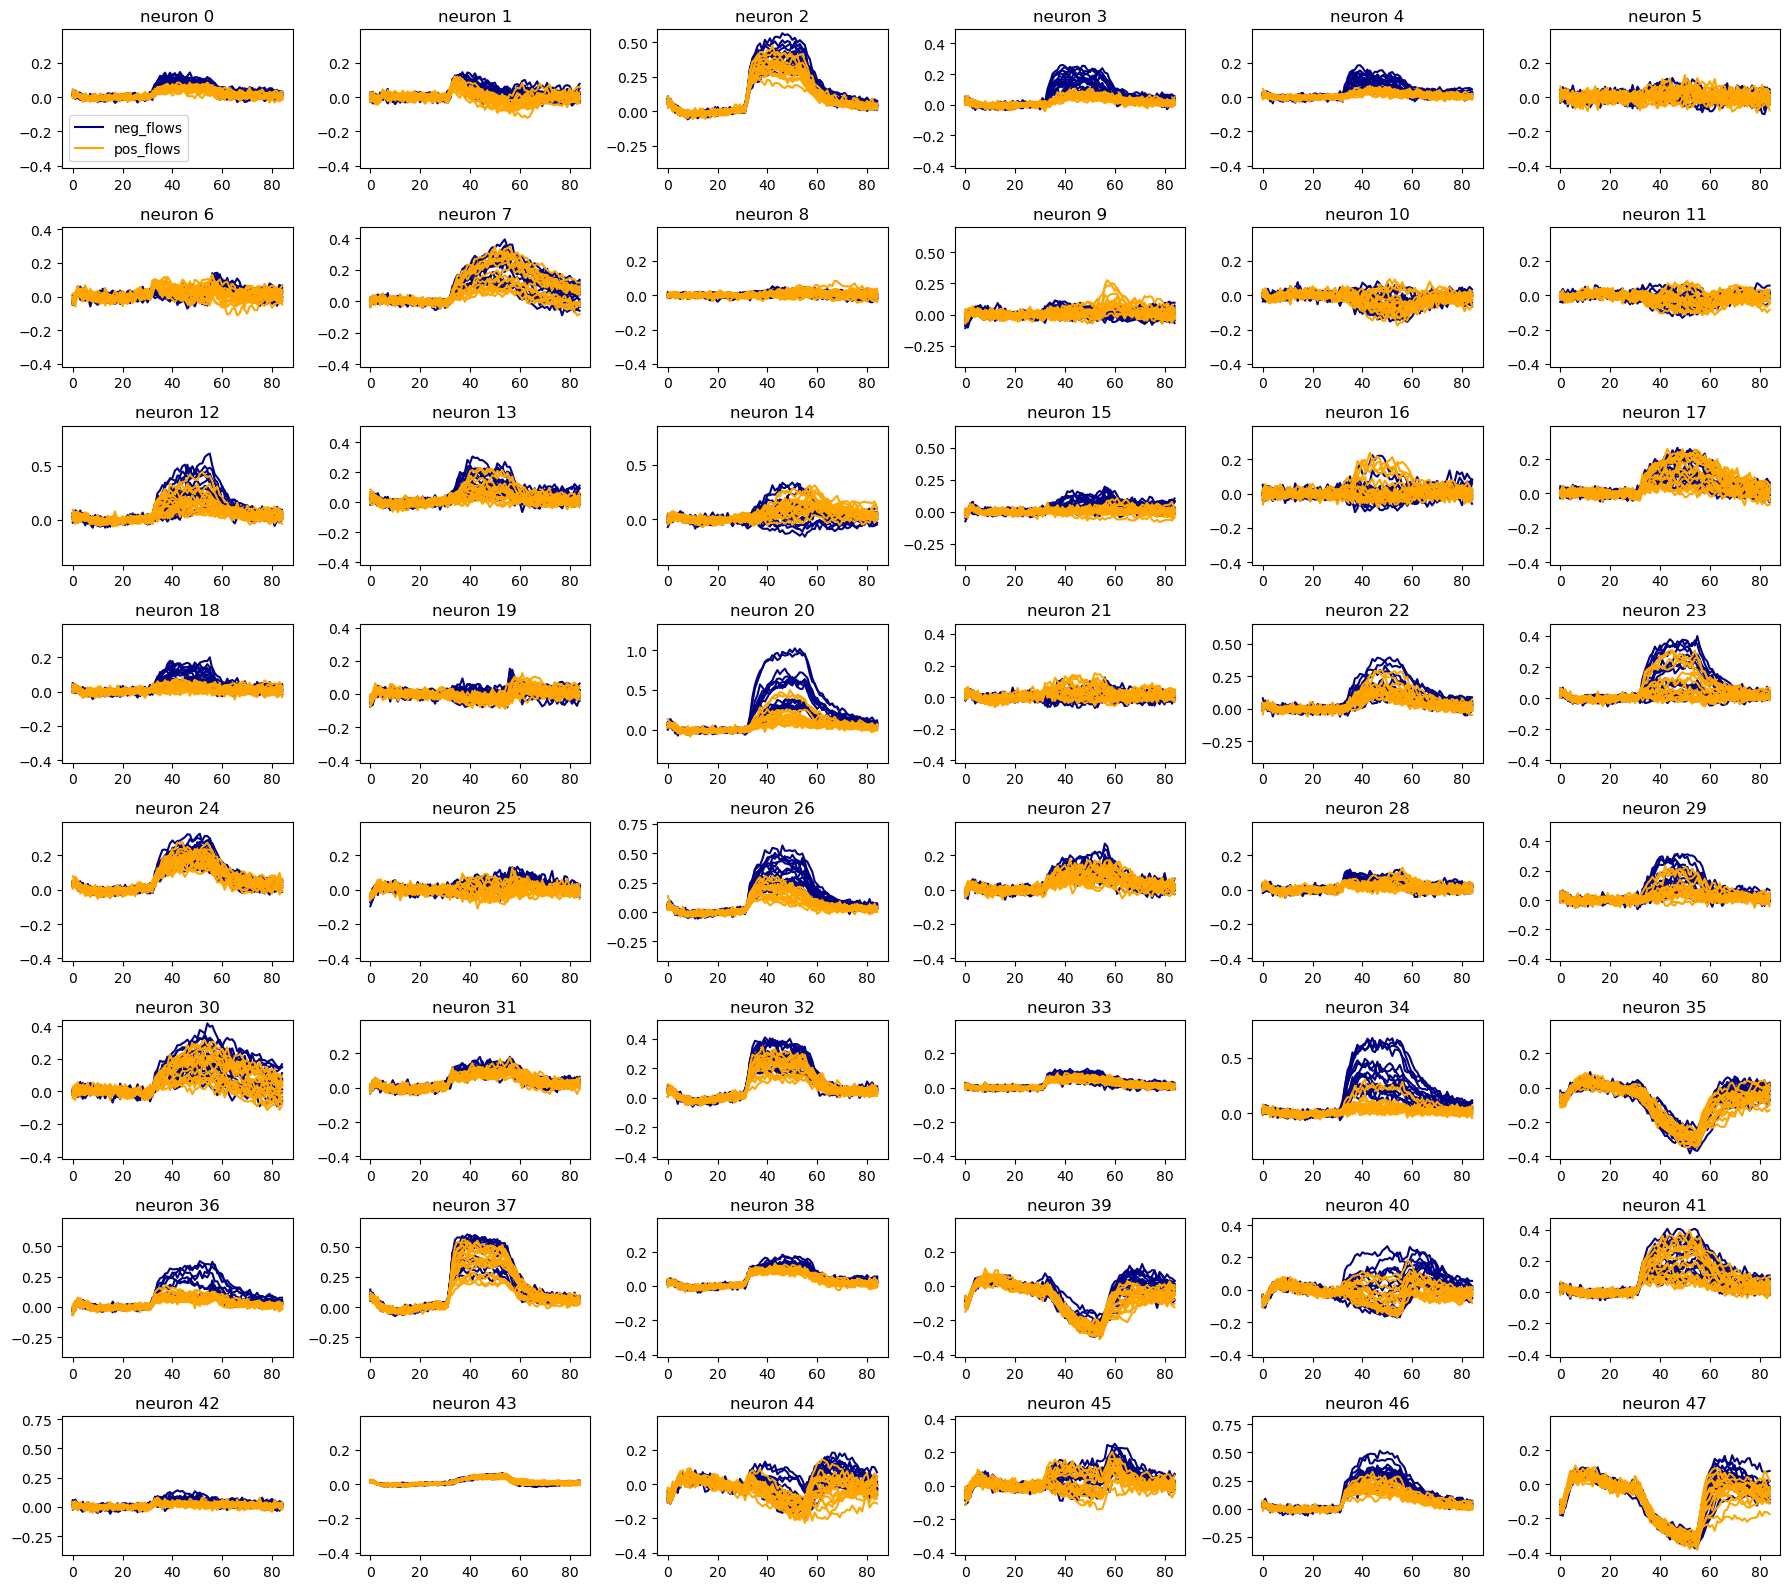

In [160]:

# pick some stimuli 
stim_is = [stim_idxs['-3dotD2'], stim_idxs['+3dotD2']]
stim_lbls = ['neg_flows','pos_flows']
colors = ['navy','orange']
# f, axes = plt.subplots(1, len(stim_is), figsize=(4*len(stim_is), 3))
# for ax, si in zip(axes, stim_is):

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i,sis in enumerate(stim_is):
        for sii,si in enumerate(sis):
            ax.plot(X[ni, si], color=colors[i], label=stim_lbls[i] if sii == 0 else None)
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()